In [1]:
%pylab inline

/Users/hantke/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import spimage
import h5py

In [3]:
data_folder = "/Users/hantke/flash_mnt/asap3/flash/gpfs/bl1/2017/data/11001733/processed"
def read_data(name, i=None, run_nr=115):
    filename_h5 = "%s/hummingbird_multiple/r%04i_ol5.h5" % (data_folder, run_nr)
    with h5py.File(filename_h5, "r") as f:
        ds = f[name]
        if i is None:
            return asarray(ds)
        elif i >= ds.shape[0]:
            return None
        else:
            return asarray(ds[i])
        
def read_intensities(i=None, run_nr=115):
    return read_data(name="/entry_1/data_1/data", i=i, run_nr=run_nr)

In [22]:
#i = 11
i = 1
image = read_intensities(i=i, run_nr=208)#123)
#mask = ones(shape=image.shape, dtype='bool')
with h5py.File("/Users/hantke/flash_mnt/asap3/flash/gpfs/bl1/2017/data/11001733/processed/mask_v3.h5", "r") as f:
    mask = asarray(f["/data"])
radius=30
cx=0
cy=0
xx,yy = meshgrid(arange(mask.shape[1]), arange(mask.shape[0]))
rr = (xx-mask.shape[1]/2)**2+(yy-mask.shape[0]/2)**2 >= (radius**2)
mask &= rr
tmp = zeros(shape=image.shape, dtype="bool")
tmp[:,:mask.shape[1]/2] = mask[:,:mask.shape[1]/2]
tmp[:,-mask.shape[1]/2:] = mask[:,-mask.shape[1]/2:]
mask = tmp

crop = 512
image_cr = spimage.crop(image, crop)
mask_cr = spimage.crop(mask, crop)


patterson_threshold = 5.
patterson_floor_cut = 50. #50. # None
patterson_mask_smooth = 4. # 1.0
patterson_diameter = 60.
patterson_xgap = 40

P, info = spimage.patterson(image_cr, mask_cr,
                      floor_cut=patterson_floor_cut, mask_smooth=patterson_mask_smooth, darkfield_x=110, darkfield_y=130,
                      darkfield_sigma=40., darkfield_N=4, normalize_median=True, radial_boost=False, 
                      log_boost=False, gauss_damp=False, gauss_damp_sigma=None, gauss_damp_threshold=None,
                      subtract_fourier_kernel=False, log_min=1.0, mask_expand=0.0, full_output=True)

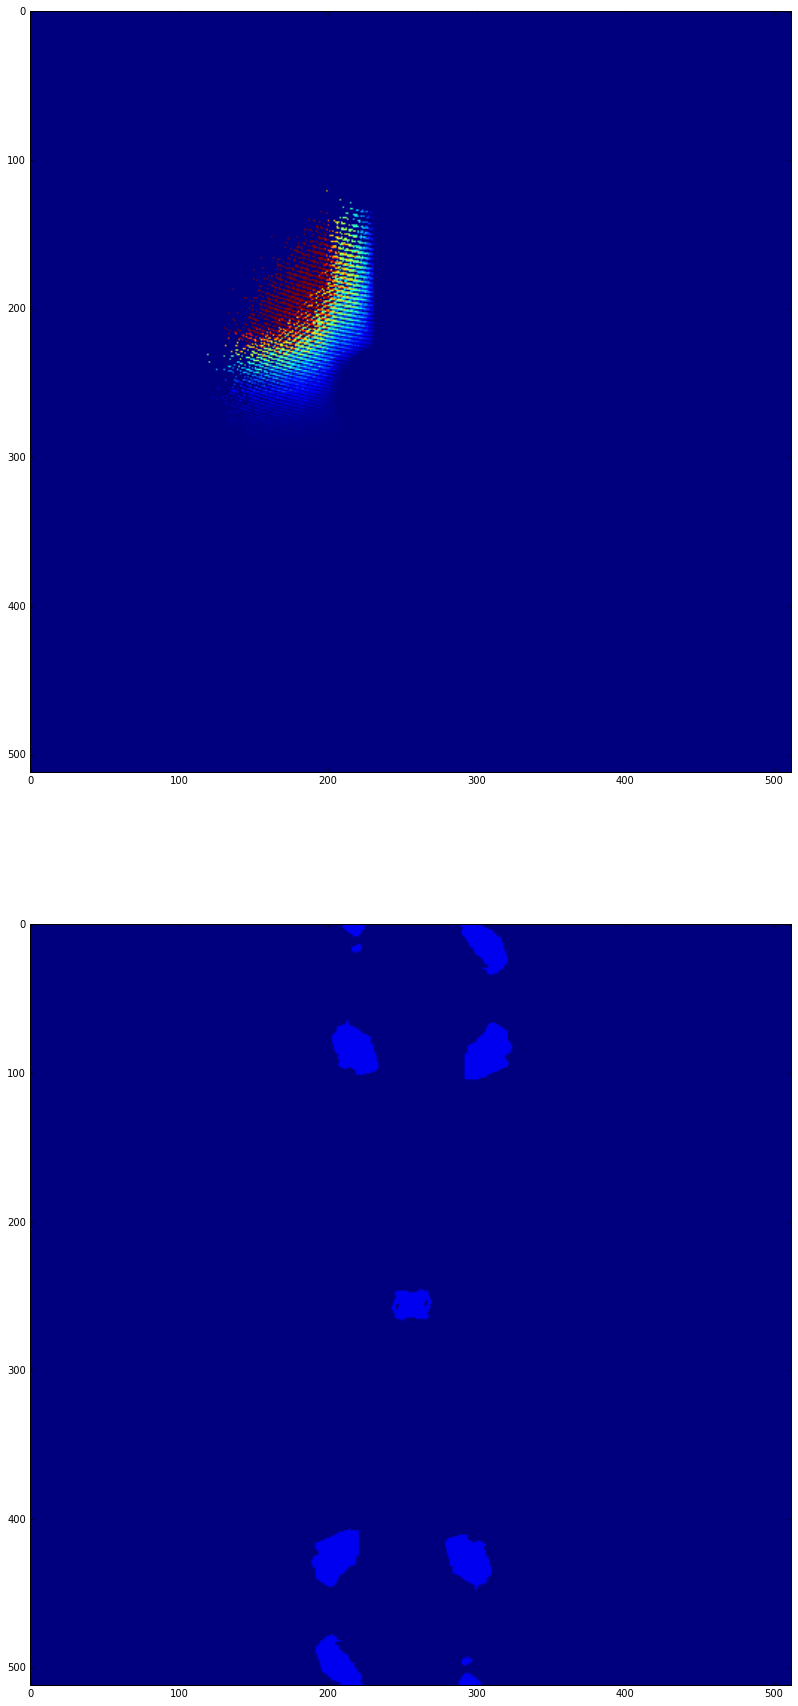

In [24]:
fig, (ax1, ax2) = subplots(2, 1, figsize=(15, 30))
#figsize(15,15)
ax1.imshow(info["intensities_times_kernel"], vmin=0, vmax=10)
ax2.imshow(abs(P)>3, vmin=0, vmax=10)